# Introduction To Audio Analysis in Python

This jupyter notebook is a quick introduction to `audio-analysis` in Python.

## Imports Librairies

In [8]:
import librosa
import librosa.display
import wave
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import IPython.display as display
from glob import glob

### Files Location : Finding The Path Of All `wav` In A Directory

The `glob` module finds all the samples matching a specified pattern, in this case all the `.wav` files. 

`glob` return a list of `paths`.

In [9]:
samples_list = glob('./Samples/*.wav')
print(type(samples_list))

<class 'list'>


### Wave Module : First Analysis

In [14]:
sample = wave.open(samples_list[0])

In [16]:
wave_methods = [m for m in dir(sample) if not m.startswith("_")]
print(wave_methods)

['close', 'getcompname', 'getcomptype', 'getfp', 'getframerate', 'getmark', 'getmarkers', 'getnchannels', 'getnframes', 'getparams', 'getsampwidth', 'initfp', 'readframes', 'rewind', 'setpos', 'tell']


### Sample Rate

In [17]:
sample.getframerate()

44100

### Number Of Channels : Mono / Strereo

In [18]:
sample.getnchannels()

2

### Bit Depth

In [33]:
help(sample.getsampwidth)
sample.getsampwidth()

Help on method getsampwidth in module wave:

getsampwidth() method of wave.Wave_read instance



3

### Get All Param

In [31]:
sample.getparams()

_wave_params(nchannels=2, sampwidth=3, framerate=44100, nframes=446807, comptype='NONE', compname='not compressed')

### Playing Audio With `IPython.display`

`IPython.display` create an audio `object`.

In [20]:
audio = display.Audio(samples_list[0])

In [11]:
audio

## Librosa

`Librosa` is a python package for music and audio-analysis.

In [47]:
sample, sample_rate = librosa.load(samples_list[0])

In [48]:
print(sample_rate)
print(type(sample))
print(sample.shape)

22050
<class 'numpy.ndarray'>
(223404,)


By default, `Librosa` load function will convert the sampling rate to `22.05khz`, as well as reducing the number of channels to `1`.

See the `librosa.load` documentation to get a complete list of parameters you can use in the `load` function. Here, we need to modify `sr` and `mono` since our sample is `44,1kHz` and `2 channels of audio`.

In [50]:
sample, sample_rate = librosa.load(samples_list[0], sr=44100, mono=False)

In [51]:
print(sample_rate)
print(sample.shape)

44100
(2, 446807)


### Create Your First `Pandas Plot`

First we need to convert our NumPy `ndarray` to as `Pandas.series`. Our sample is in stereo, so we need to pass only one channel to `Pandas`. 

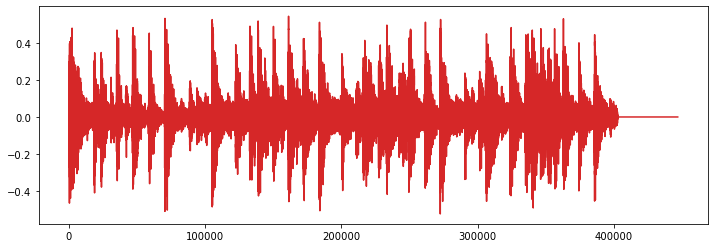

In [75]:
left_channel = sample[0]
right_channel = sample[1]
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

pd.Series(left_channel).plot(figsize=(12, 4), color=color_pal[3])
plt.show()

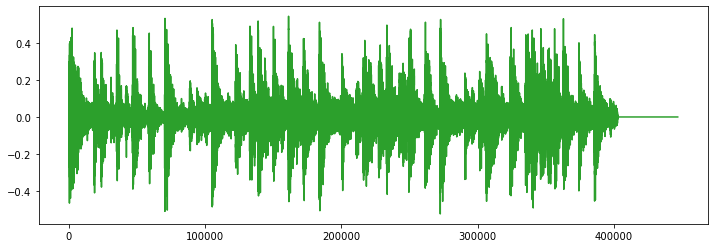

In [73]:
pd.Series(right_channel).plot(figsize=(12, 4), color=color_pal[2])
plt.show()

We can zoom using the NumPy `slice` function.

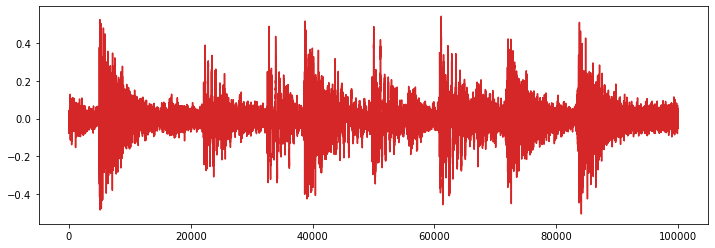

In [76]:
left_channel = sample[0]
pd.Series(left_channel[100000:200000]).plot(figsize=(12, 4), color=color_pal[3])
plt.show()

### Librosa Spectrogram

In [78]:
D = librosa.stft(left_channel)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 873)

`Plot` the transformed`audio data`.

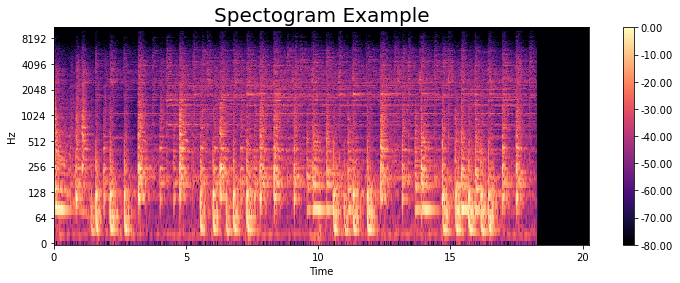

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()